In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import pandas as pd
import numpy as np

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt

# Import method for train-validation split
from sklearn.model_selection import train_test_split

# Import methods for building and visualizing decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import suitable performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error

In [2]:
credit_df = pd.read_csv('MyCreditData.csv')
credit_df.head()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,gender,profit
0,3,18,0,2,1049,4,2,2,2,3,...,21,1,0,0,1,0,0,0,female,242
1,3,9,0,5,2799,4,0,1,2,0,...,36,1,0,1,1,1,0,0,male,596
2,0,12,4,8,841,0,1,1,2,3,...,23,1,0,0,3,0,0,0,female,25
3,3,12,0,5,2122,4,0,0,2,0,...,39,1,0,1,3,1,0,1,male,568
4,3,12,0,5,2171,4,0,2,2,3,...,38,0,2,1,3,0,0,1,male,782


In [3]:
non_categorical_columns = ['duration', 'amount', 'age', 'profit']

for column in credit_df.columns:
    if column not in non_categorical_columns:
        credit_df[column] = pd.Categorical(credit_df[column])

credit_df['is_profitable'] = np.where(credit_df['profit'] > 0, 1, 0)

In [4]:
# Split data into input variables and target variable.
y = credit_df['is_profitable']
X = credit_df.iloc[:, :-2] # ALL columns but the last two, profit and is_profitable.

# Use dummy variables for categorical variables.
X = pd.get_dummies(X, drop_first=False)

# Split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 1)

In [5]:
X

,duration,amount,age,checking_account_0,checking_account_1,checking_account_2,checking_account_3,credit_history_0,credit_history_1,credit_history_2,...,job_3,people_liable_0,people_liable_1,telephone_0,telephone_1,foreign_worker_0,foreign_worker_1,gender_female,gender_male,gender_nonbinary/notreported
0,18,1049,21,False,False,False,True,True,False,False,...,False,True,False,True,False,True,False,True,False,False
1,9,2799,36,False,False,False,True,True,False,False,...,False,False,True,True,False,True,False,False,True,False
2,12,841,23,True,False,False,False,False,False,False,...,True,True,False,True,False,True,False,True,False,False
3,12,2122,39,False,False,False,True,True,False,False,...,True,False,True,True,False,False,True,False,True,False
4,12,2171,38,False,False,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,False,False,False,True,False,False,False,...,True,False,True,True,False,True,False,False,True,False
996,24,2303,45,False,False,False,True,False,False,False,...,False,True,False,True,False,True,False,False,True,False
997,21,12680,30,False,True,False,False,True,False,False,...,False,True,False,False,True,True,False,False,True,False
998,12,6468,52,True,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False


In [6]:
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=20)
tree_clf=tree_clf.fit(X_train, y_train)

THe darker the color the more "pure" the node is (dark blue indicates higher probability of 1 & dark orange indicates higher probability of 0)

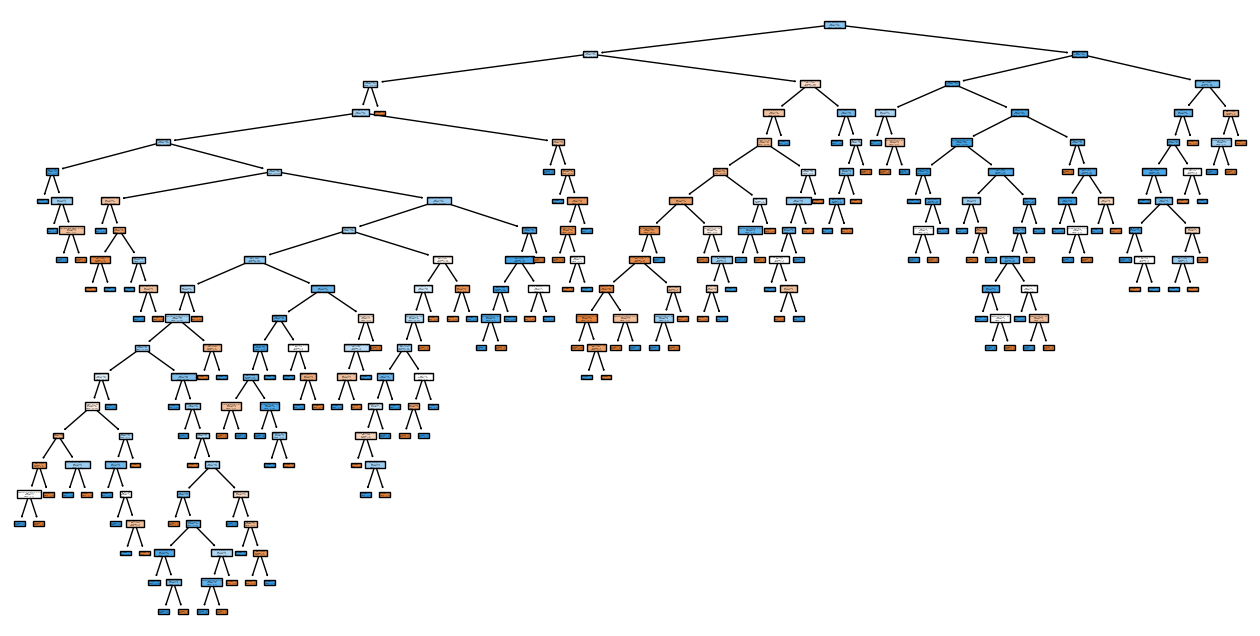

In [7]:
fig = plt.figure(figsize=(16, 8))
fig = tree.plot_tree(tree_clf, feature_names=X.columns, filled=True)

In [8]:
print("Number of leaves: ", tree_clf.get_n_leaves())
print("Depth of the tree: ", tree_clf.get_depth())


Number of leaves:  141
Depth of the tree:  20


### Evaluating the Performance.

In [9]:
y_train_pred = tree_clf.predict(X_train)
y_val_pred = tree_clf.predict(X_val)

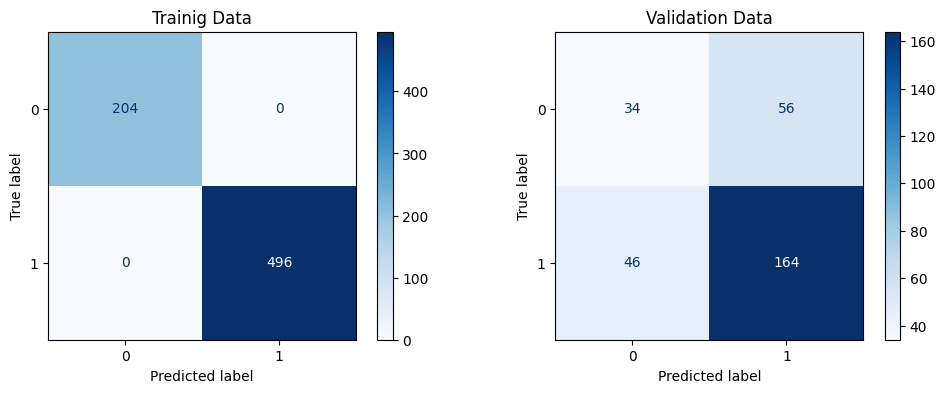

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Trainig Data')
ConfusionMatrixDisplay.from_estimator(tree_clf, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('Validation Data')
ConfusionMatrixDisplay.from_estimator(tree_clf, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plt.show()

In [11]:
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))
print("---------------------------------------------------------------------------------")
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))

Accuracy Score (Training):  1.0
Accuracy Score (Validation):  0.66
---------------------------------------------------------------------------------
Accuracy Score (Training):  1.0
Accuracy Score (Validation):  0.66


### Pruning Decision Trees - 1

In [12]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [13]:
ccp_alphas

array([0.        , 0.00094424, 0.00125   , 0.0012987 , 0.00130952,
       0.00134199, 0.00134921, 0.00136364, 0.00137143, 0.00142857,
       0.00142857, 0.00142857, 0.0015873 , 0.00163265, 0.00163265,
       0.00164777, 0.001671  , 0.00171429, 0.00177706, 0.00178932,
       0.00181818, 0.00186688, 0.00190476, 0.00190476, 0.00195918,
       0.00210419, 0.00214286, 0.00214286, 0.00217687, 0.00218254,
       0.00222222, 0.00228445, 0.00230159, 0.00238095, 0.00238095,
       0.00244716, 0.0024531 , 0.0025    , 0.0025    , 0.00261615,
       0.00269255, 0.00269841, 0.00285714, 0.00319529, 0.00323676,
       0.00324675, 0.00330834, 0.00333791, 0.0033758 , 0.00341849,
       0.0034211 , 0.00342132, 0.00343543, 0.00348239, 0.00367118,
       0.00409281, 0.00420075, 0.00442285, 0.00480159, 0.00520552,
       0.00583696, 0.00740969, 0.00763798, 0.00809014, 0.01117928,
       0.0436274 ])

In [14]:
clfs = []

for ccp_alpha in ccp_alphas:

    # train models.
    curr_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    curr_clf.fit(X_train, y_train)

    # save the model.
    clfs.append(curr_clf)



In [15]:
## Grab the number of nodes and level.
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

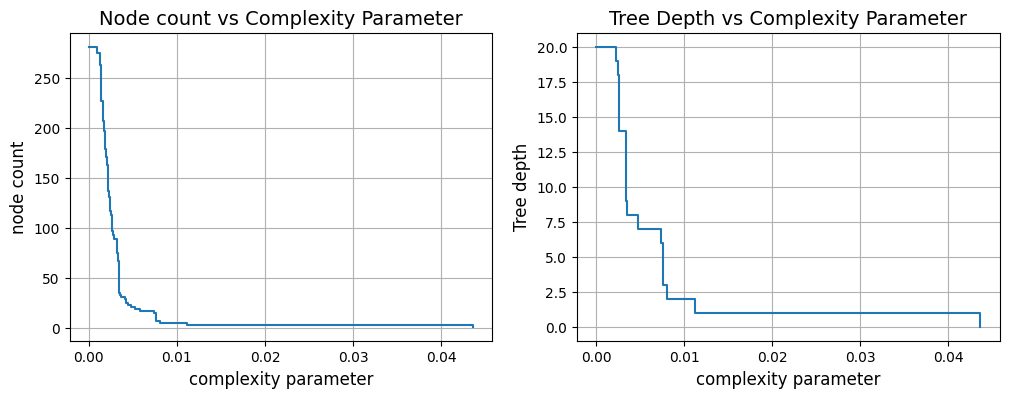

In [16]:
# Create plots.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Node count vs Complexity Parameter', fontsize=14)
ax[0].plot(ccp_alphas, node_counts, label="no of nodes", drawstyle="steps-post")
ax[0].set_xlabel('complexity parameter', fontsize=12)
ax[0].set_ylabel('node count', fontsize=12)
ax[0].grid()

ax[1].set_title('Tree Depth vs Complexity Parameter', fontsize=14)
ax[1].plot(ccp_alphas, depth, label="depth", drawstyle="steps-post")
ax[1].set_xlabel('complexity parameter', fontsize=12)
ax[1].set_ylabel('Tree depth', fontsize=12)
ax[1].grid()
plt.show()

### Studying the accuracy of validation data.

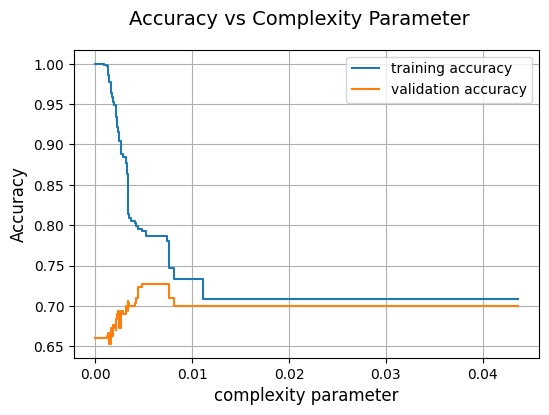

In [17]:
train_acc = []
val_acc = []

# Loop trough all the clf models.
for model in clfs:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_acc.append(accuracy_score(y_train_pred, y_train))
    val_acc.append(accuracy_score(y_val_pred, y_val))
    
# plotting the results
plt.figure(figsize=(6, 4))
plt.suptitle('Accuracy vs Complexity Parameter', fontsize=14)
plt.plot(ccp_alphas, train_acc, label="training accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, val_acc, label="validation accuracy", drawstyle="steps-post")
plt.xlabel('complexity parameter', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid()
plt.legend()
plt.show()

#### Grabbing the Best CCP alpha.

In [18]:
best_ccp_alpha = ccp_alphas[val_acc.index(max(val_acc))]
print('Best CCP alpha: ', best_ccp_alpha)

Best CCP alpha:  0.004801587301587302


#### Training the best model.

In [19]:
best_tree_clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004801587301587302, random_state=0)

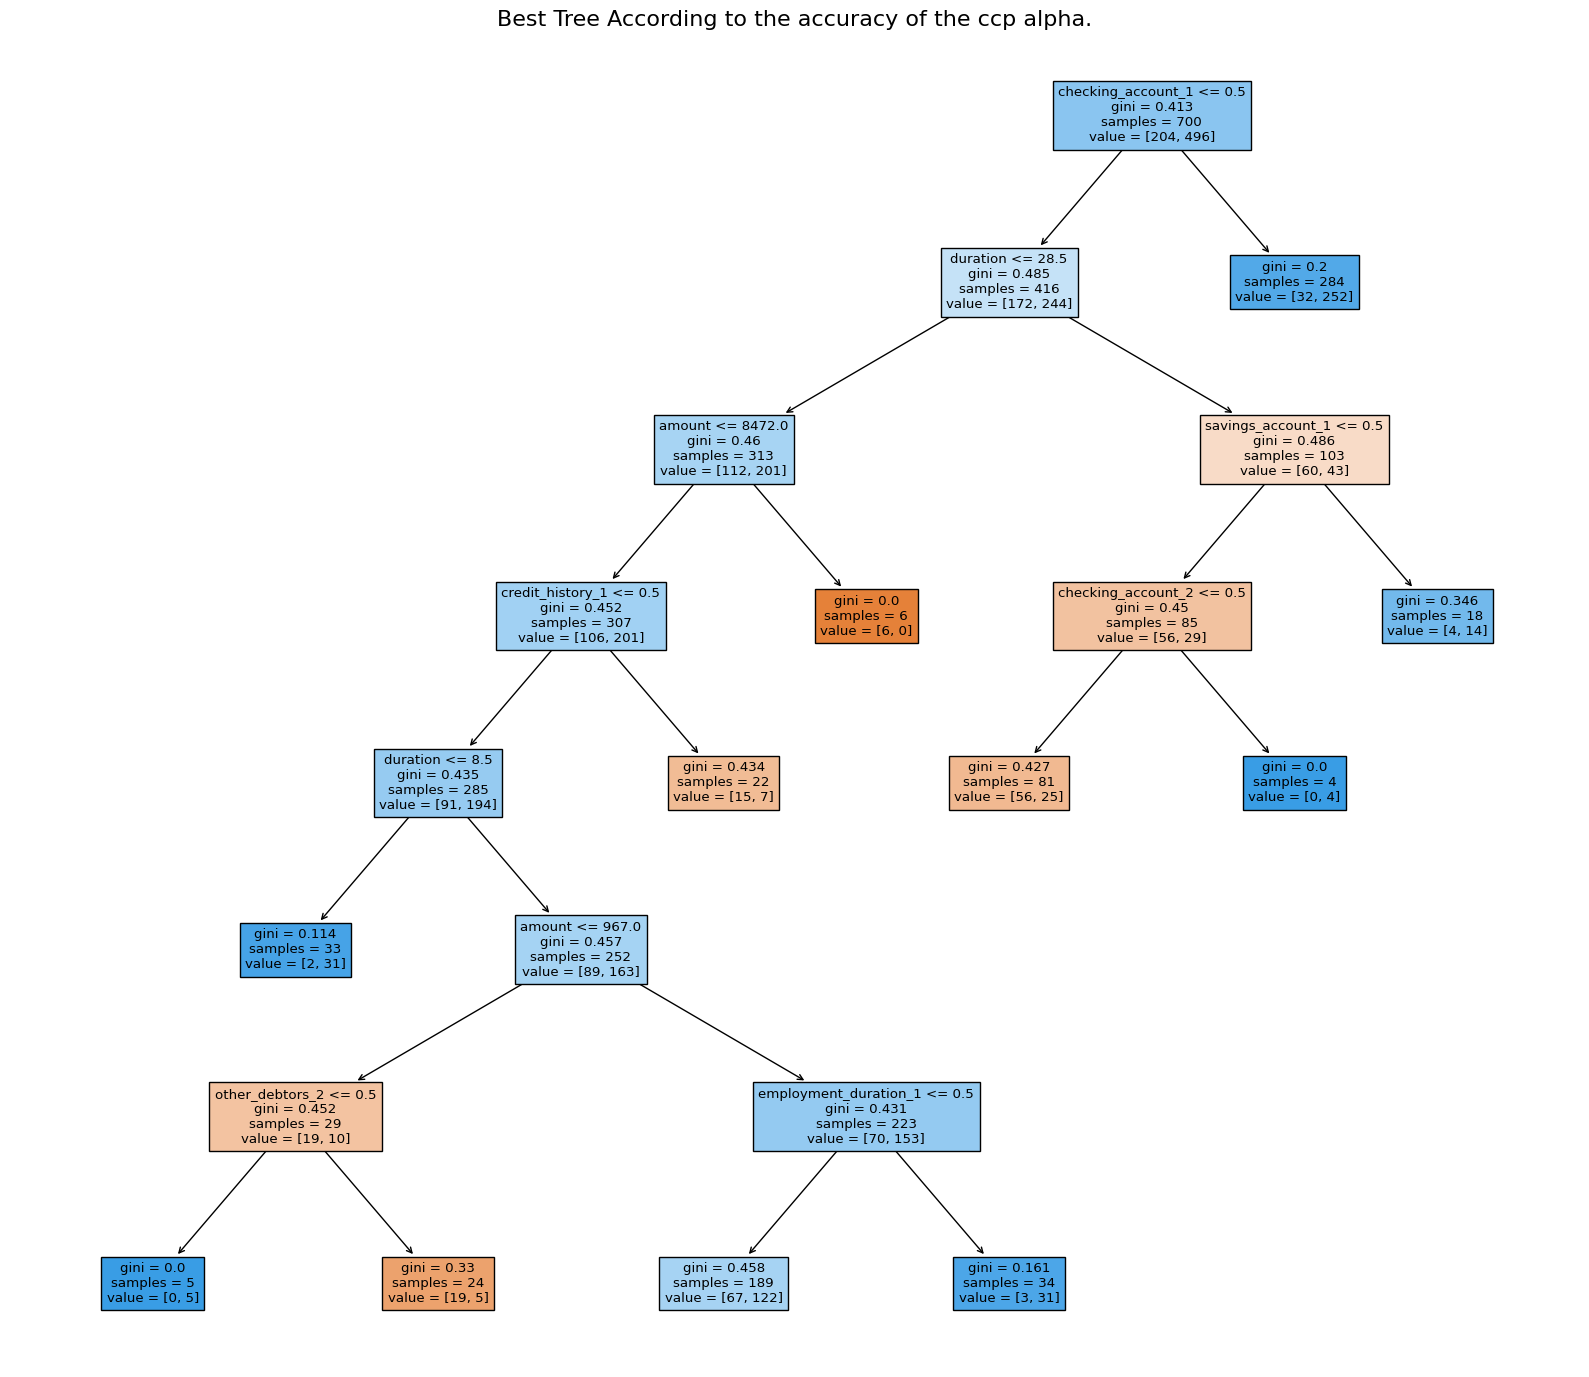

In [20]:
fig = plt.figure(figsize=(16, 14))
fig = tree.plot_tree(best_tree_clf, feature_names=X.columns, filled=True)
plt.suptitle("Best Tree According to the accuracy of the ccp alpha.", fontsize=16)
plt.tight_layout()

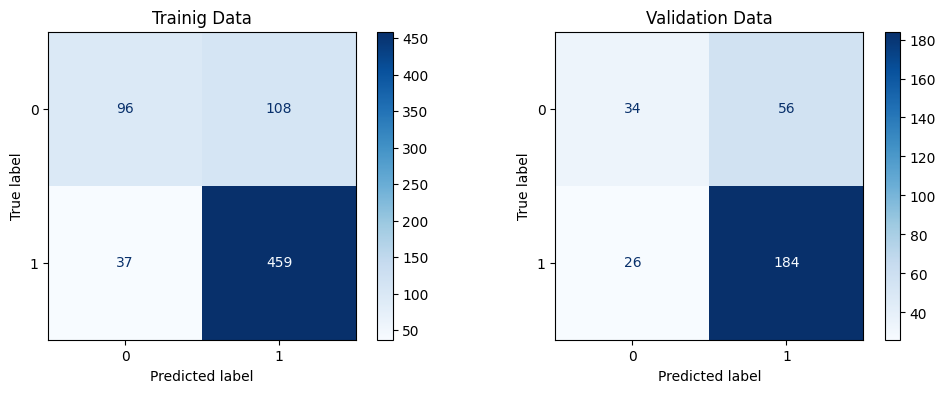

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Trainig Data')
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('Validation Data')
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plt.show()

In [22]:
y_train_pred = best_tree_clf.predict(X_train)
y_val_pred = best_tree_clf.predict(X_val)

In [23]:
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))
print("---------------------------------------------------------------------------------")

Accuracy Score (Training):  0.793
Accuracy Score (Validation):  0.727
---------------------------------------------------------------------------------


In [24]:
tree_clf = DecisionTreeClassifier(random_state=0)

In [25]:
# define the range.
param_grid = { 'max_depth': np.arange(2, 26) }

# perform grid search.
grid = GridSearchCV(tree_clf, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [26]:
print("The optimal value of max_depth is: ", grid_search.best_params_['max_depth'])

The optimal value of max_depth is:  16


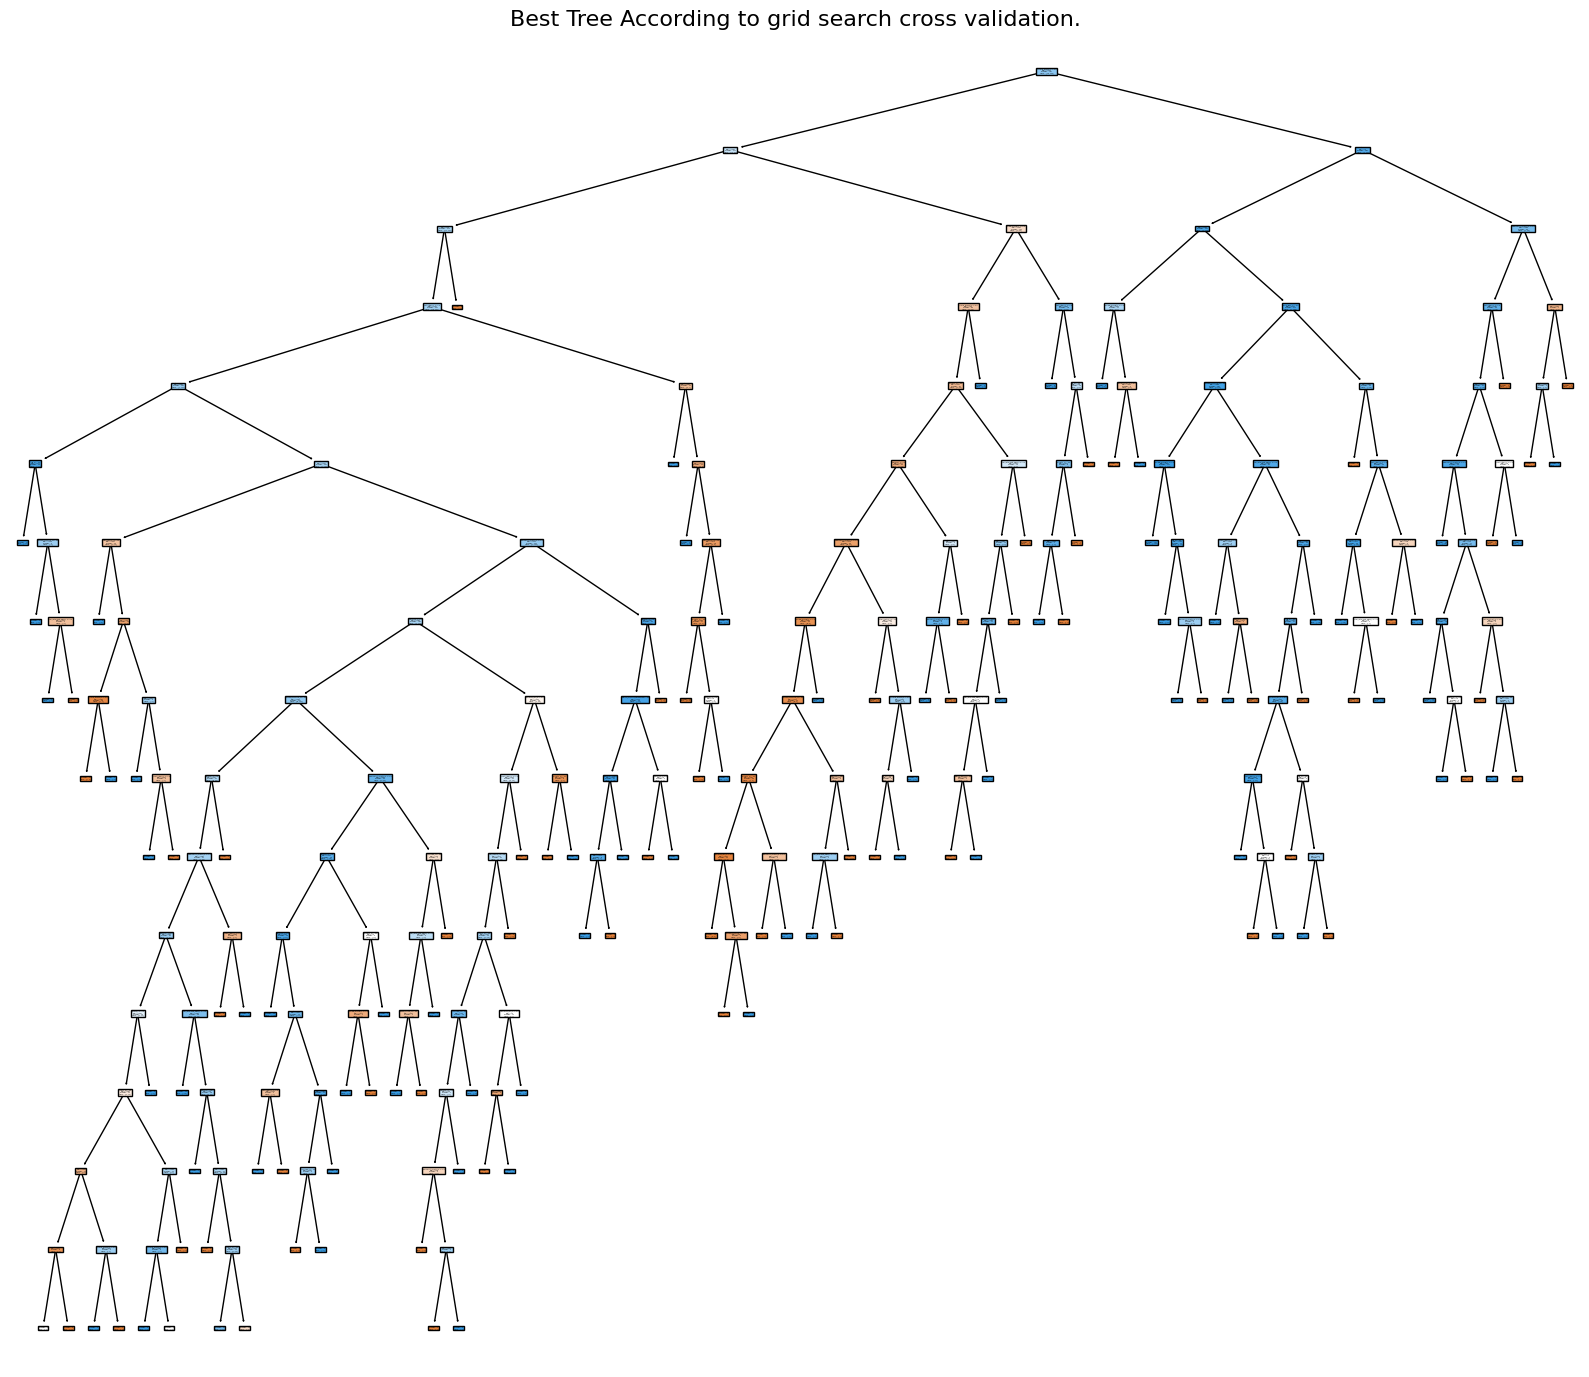

In [27]:
# Train the "Best" tree.
best_tree_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=grid_search.best_params_['max_depth'])
best_tree_clf.fit(X_train, y_train)

# visualize the tree.
fig = plt.figure(figsize=(16, 14))
fig = tree.plot_tree(best_tree_clf, feature_names=X.columns, filled=True)
plt.suptitle("Best Tree According to grid search cross validation.", fontsize=16)
plt.tight_layout()

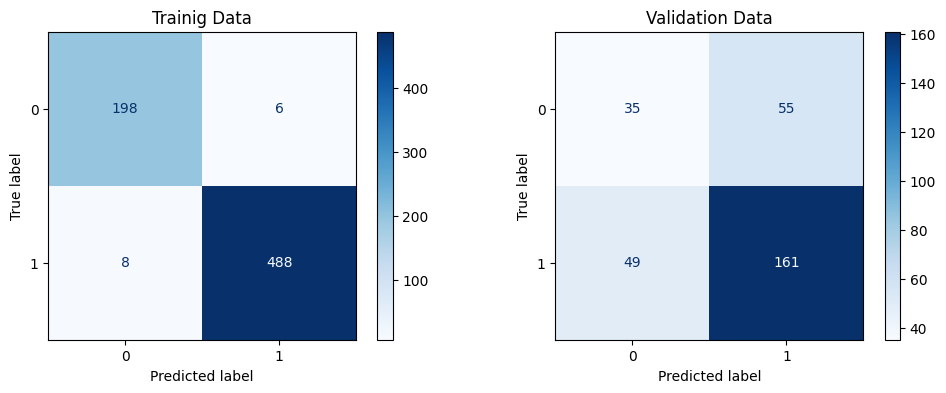

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Trainig Data')
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('Validation Data')
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plt.show()

In [41]:
y_train_pred = best_tree_clf.predict(X_train)
y_val_pred = best_tree_clf.predict(X_val)

In [42]:
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))
print("F1 Score (Validation): ",  round(f1_score(y_val_pred, y_val), 3))
print("Sensitivity Score (Validation): ",  round(recall_score(y_val_pred, y_val, pos_label=1), 3))
print("Specificity Score (Validation): ",  round(recall_score(y_val_pred, y_val, pos_label=0), 3))
print("---------------------------------------------------------------------------------")

Accuracy Score (Training):  0.98
Accuracy Score (Validation):  0.653
F1 Score (Validation):  0.756
Sensitivity Score (Validation):  0.745
Specificity Score (Validation):  0.417
---------------------------------------------------------------------------------


## Regression Tree

In [43]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg=tree_reg.fit(X_train, y_train)

THe darker the color the more "pure" the node is (dark blue indicates higher probability of 1 & dark orange indicates higher probability of 0)

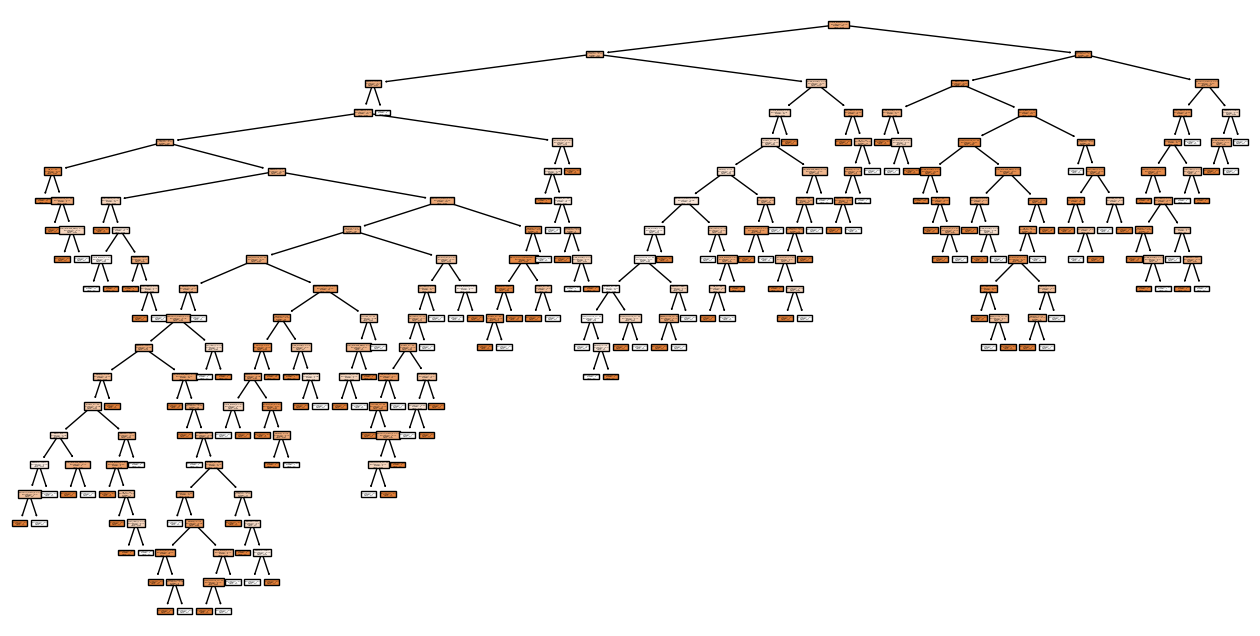

In [44]:
fig = plt.figure(figsize=(16, 8))
fig = tree.plot_tree(tree_reg, feature_names=X.columns, filled=True)

In [45]:
print("Number of leaves: ", tree_reg.get_n_leaves())
print("Depth of the tree: ", tree_reg.get_depth())


Number of leaves:  141
Depth of the tree:  20


In [46]:
path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [47]:
ccp_alphas

array([0.        , 0.00047212, 0.000625  , 0.00064935, 0.00065476,
       0.000671  , 0.0006746 , 0.00068182, 0.00068571, 0.00071429,
       0.00071429, 0.00071429, 0.00079365, 0.00081633, 0.00081633,
       0.00082389, 0.0008355 , 0.00085714, 0.00085714, 0.00088853,
       0.00089466, 0.00090909, 0.00093344, 0.00095238, 0.00095238,
       0.00097959, 0.00105209, 0.00107143, 0.00107143, 0.00108844,
       0.00109127, 0.00111111, 0.00114222, 0.00115079, 0.00119048,
       0.00122358, 0.00122655, 0.00125   , 0.00125   , 0.00130807,
       0.00134627, 0.00134921, 0.00142857, 0.00159764, 0.00161838,
       0.00165417, 0.00166896, 0.0016879 , 0.0017013 , 0.00170924,
       0.00171055, 0.00171066, 0.00171771, 0.0017412 , 0.00183559,
       0.0020464 , 0.00210038, 0.00221142, 0.00240079, 0.00260276,
       0.00291848, 0.00370484, 0.00381899, 0.00404507, 0.00558964,
       0.0218137 ])

In [48]:
regs = []

for ccp_alpha in ccp_alphas:

    # train models.
    curr_reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    curr_reg.fit(X_train, y_train)

    # save the model.
    regs.append(curr_reg)



In [49]:
## Grab the number of nodes and level.
node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]

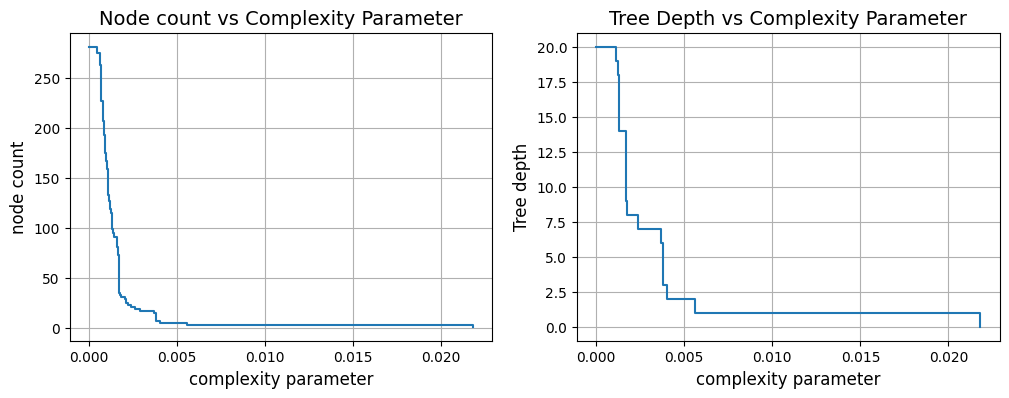

In [50]:
# Create plots.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Node count vs Complexity Parameter', fontsize=14)
ax[0].plot(ccp_alphas, node_counts, label="no of nodes", drawstyle="steps-post")
ax[0].set_xlabel('complexity parameter', fontsize=12)
ax[0].set_ylabel('node count', fontsize=12)
ax[0].grid()

ax[1].set_title('Tree Depth vs Complexity Parameter', fontsize=14)
ax[1].plot(ccp_alphas, depth, label="depth", drawstyle="steps-post")
ax[1].set_xlabel('complexity parameter', fontsize=12)
ax[1].set_ylabel('Tree depth', fontsize=12)
ax[1].grid()
plt.show()

#### Grabbing the Best CCP alpha.

In [18]:
best_ccp_alpha = ccp_alphas[val_acc.index(max(val_acc))]
print('Best CCP alpha: ', best_ccp_alpha)

Best CCP alpha:  0.004801587301587302


#### Training the best model.

In [19]:
best_tree_reg = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=best_ccp_alpha)
best_tree_reg.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004801587301587302, random_state=0)

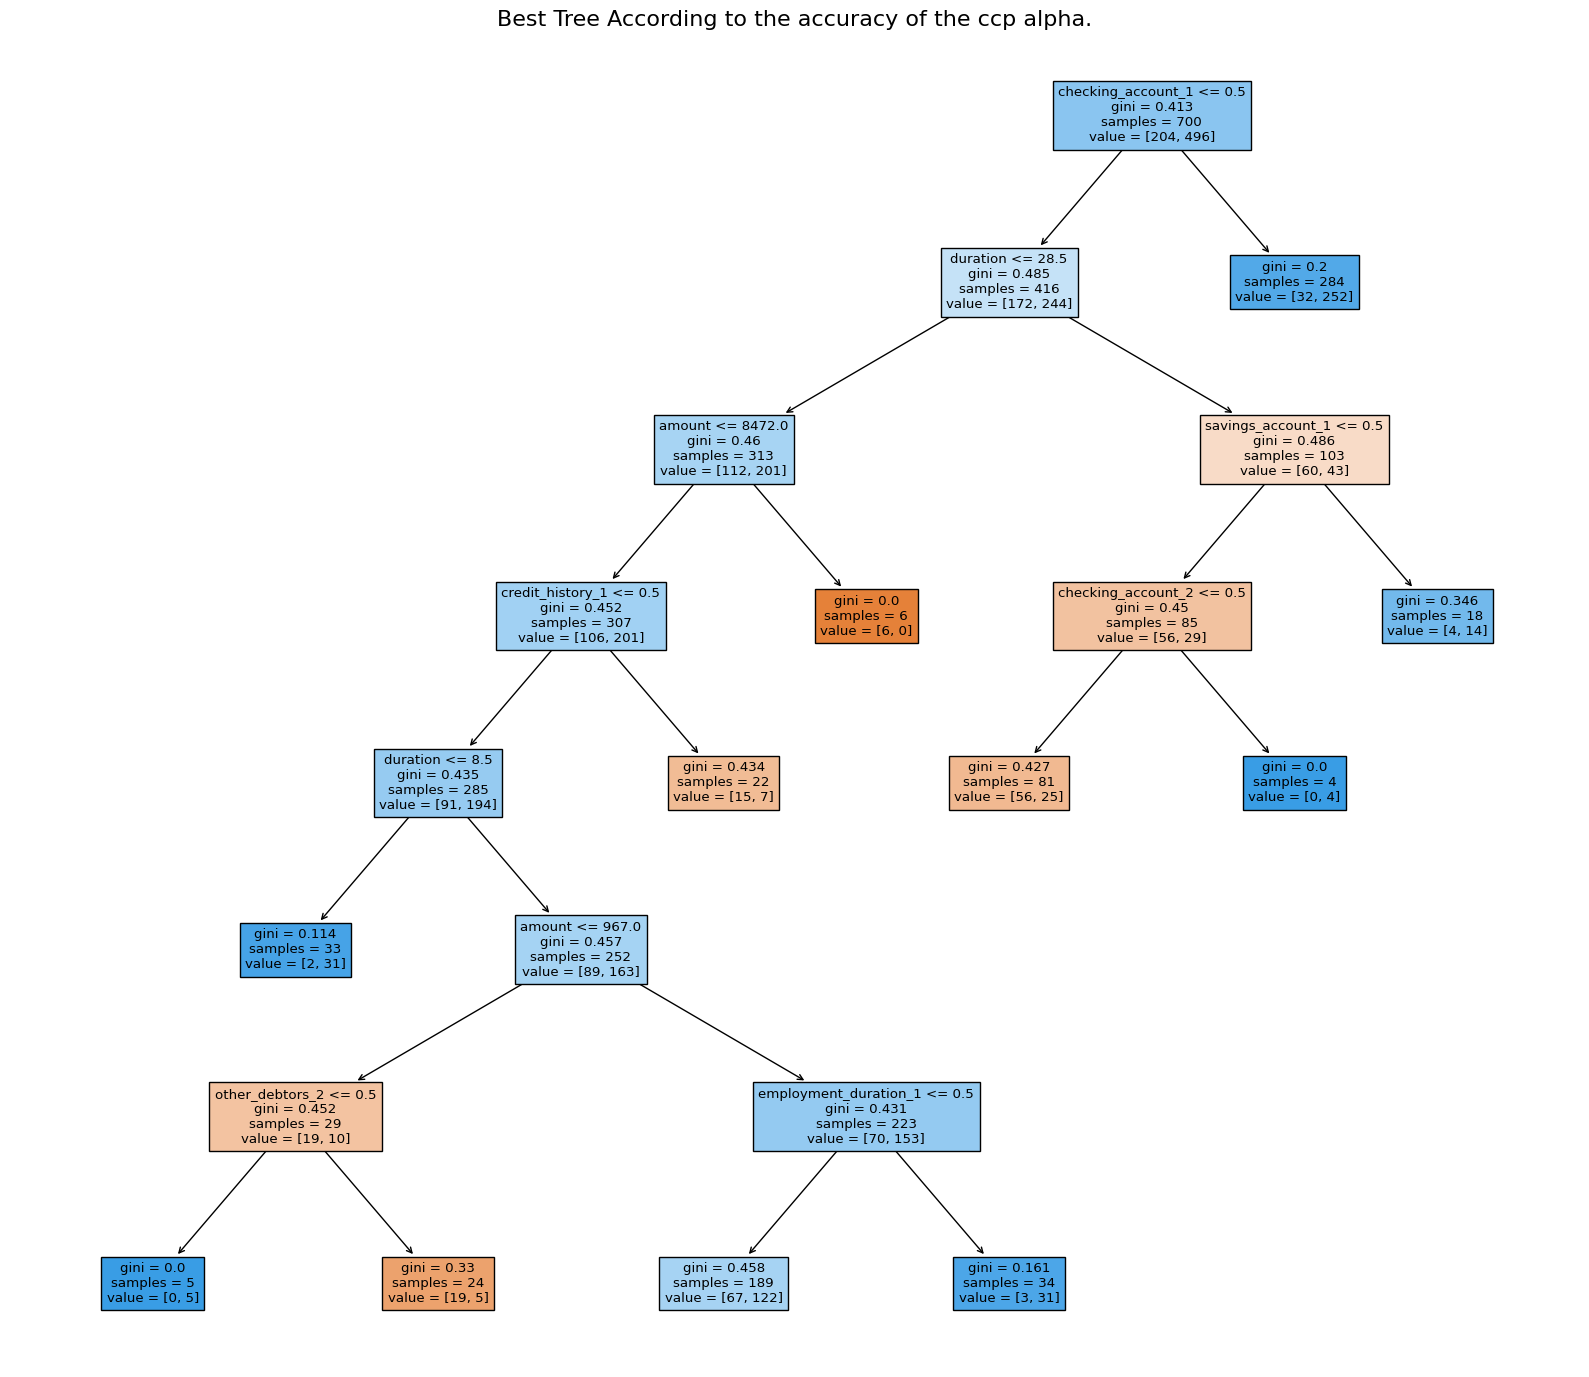

In [20]:
fig = plt.figure(figsize=(16, 14))
fig = tree.plot_tree(best_tree_reg, feature_names=X.columns, filled=True)
plt.suptitle("Best Tree According to the accuracy of the ccp alpha.", fontsize=16)
plt.tight_layout()

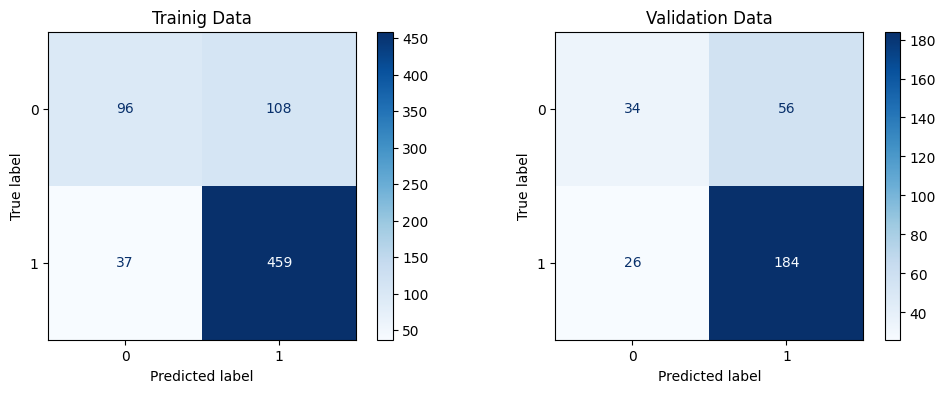

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Trainig Data')
ConfusionMatrixDisplay.from_estimator(best_tree_reg, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('Validation Data')
ConfusionMatrixDisplay.from_estimator(best_tree_reg, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plt.show()

In [22]:
y_train_pred = best_tree_reg.predict(X_train)
y_val_pred = best_tree_reg.predict(X_val)

In [23]:
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))
print("---------------------------------------------------------------------------------")

Accuracy Score (Training):  0.793
Accuracy Score (Validation):  0.727
---------------------------------------------------------------------------------


In [24]:
tree_reg = DecisionTreeRegressor(random_state=0)

In [25]:
# define the range.
param_grid = { 'max_depth': np.arange(2, 26) }

# perform grid search.
grid = GridSearchCV(tree_reg, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [26]:
print("The optimal value of max_depth is: ", grid_search.best_params_['max_depth'])

The optimal value of max_depth is:  16


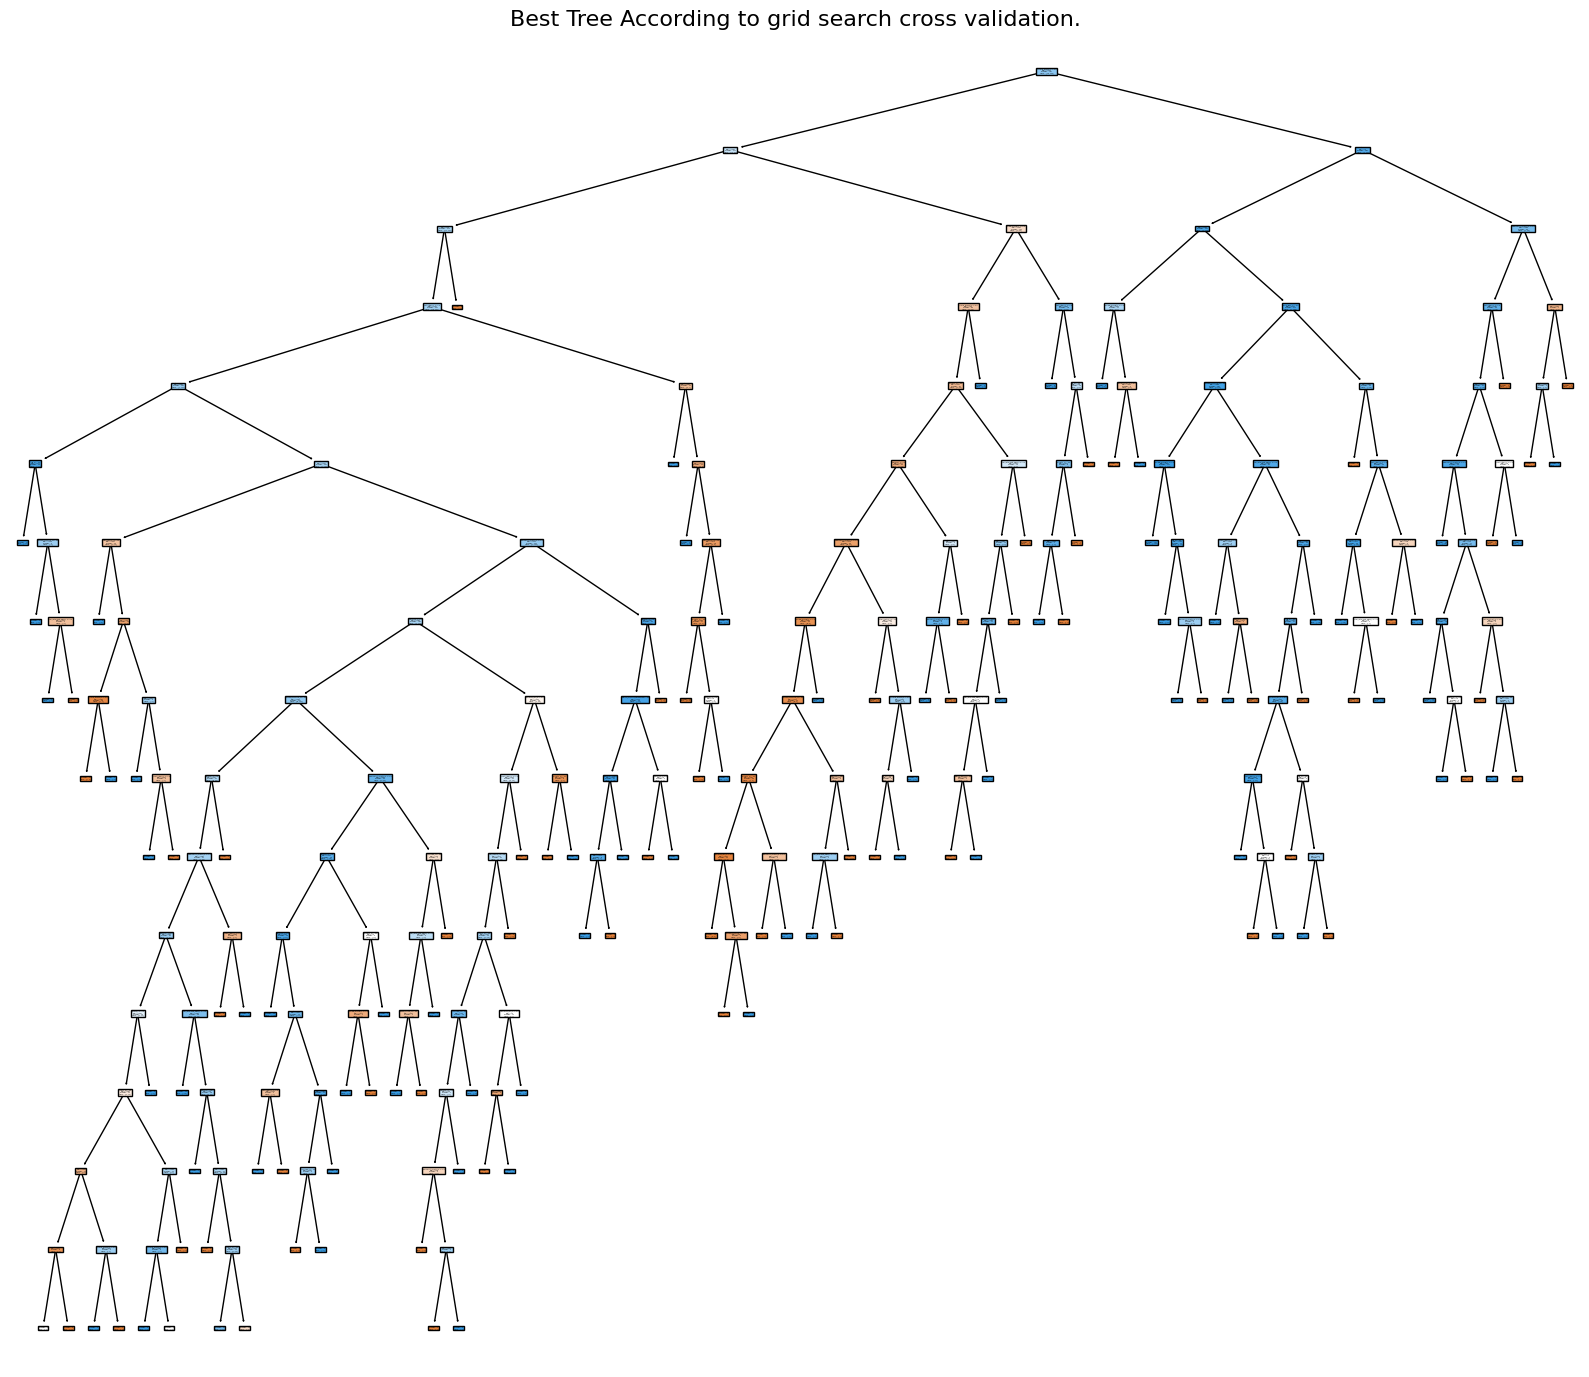

In [27]:
# Train the "Best" tree.
best_tree_reg = tree.DecisionTreeRegressor(random_state=0, max_depth=grid_search.best_params_['max_depth'])
best_tree_reg.fit(X_train, y_train)

# visualize the tree.
fig = plt.figure(figsize=(16, 14))
fig = tree.plot_tree(best_tree_reg, feature_names=X.columns, filled=True)
plt.suptitle("Best Tree According to grid search cross validation.", fontsize=16)
plt.tight_layout()

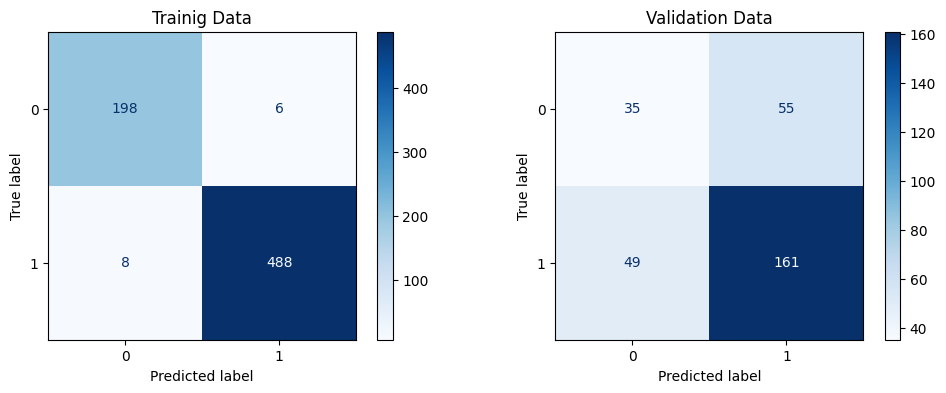

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title('Trainig Data')
ConfusionMatrixDisplay.from_estimator(best_tree_reg, X_train, y_train, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('Validation Data')
ConfusionMatrixDisplay.from_estimator(best_tree_reg, X_val, y_val, cmap=plt.cm.Blues, ax=ax[1])
plt.show()

In [29]:
y_train_pred = best_tree_reg.predict(X_train)
y_val_pred = best_tree_reg.predict(X_val)

In [30]:
print("Accuracy Score (Training): ", round(accuracy_score(y_train_pred, y_train), 3))
print("Accuracy Score (Validation): ",  round(accuracy_score(y_val_pred, y_val), 3))
print("F1 Score (Validation): ",  round(f1_score(y_val_pred, y_val), 3))
print("Sensitivity Score (Validation): ",  round(recall_score(y_val_pred, y_val, pos_label=1), 3))
print("Specificity Score (Validation): ",  round(recall_score(y_val_pred, y_val, pos_label=0), 3))
print("---------------------------------------------------------------------------------")

Accuracy Score (Training):  0.98
Accuracy Score (Validation):  0.653
F1 Score (Validation):  0.756
Sensitivity Score (Validation):  0.745
Specificity Score (Validation):  0.417
---------------------------------------------------------------------------------
